Title: Performance Evaluation

Task 1: Regression Metrics<br>
Use metrics like RMSE and MAE for the House Prices dataset.

In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = np.array([400000, 500000, 600000, 650000, 700000])
y_pred = np.array([420000, 480000, 610000, 640000, 710000])

# Calculate MSE first
mse = mean_squared_error(y_true, y_pred)

# Calculate RMSE manually
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")



RMSE: 14832.40
MAE: 14000.00


Task 2: Classification Metrics<br>
Evaluate the Iris dataset using accuracy, precision, recall, and F1-score.

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on validation set
y_pred = clf.predict(X_val)

# Evaluate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")
print(f"F1-score (weighted): {f1:.2f}")

# Optional: detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=iris.target_names))


Accuracy: 1.00
Precision (weighted): 1.00
Recall (weighted): 1.00
F1-score (weighted): 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Task 3: AUC-ROC Curve for Churn Model<br>
Generate an AUC-ROC curve to evaluate customer churn model performance.

AUC-ROC Score: 0.00


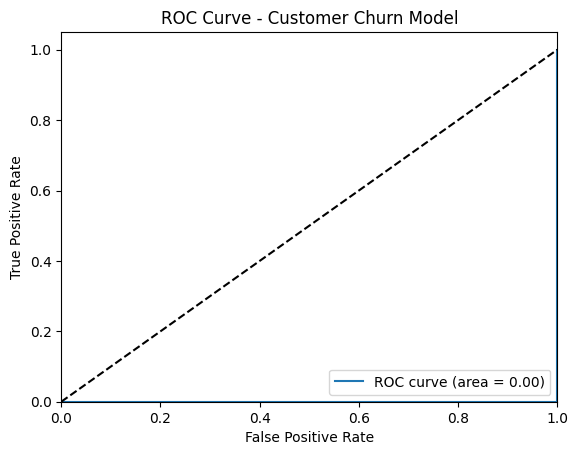

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


data = {
    'age': [25, 45, 35, 50, 23, 40, 60, 48, 33, 36],
    'monthly_charges': [70, 90, 80, 75, 60, 85, 95, 77, 66, 73],
    'tenure_months': [12, 24, 18, 36, 8, 15, 40, 22, 10, 13],
    'churn': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1]  # 0 = no churn, 1 = churn
}

df = pd.DataFrame(data)

X = df.drop('churn', axis=1)
y = df['churn']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Predict probabilities for positive class
y_probs = rf.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_probs)
auc_score = roc_auc_score(y_val, y_probs)

print(f"AUC-ROC Score: {auc_score:.2f}")

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Customer Churn Model')
plt.legend(loc="lower right")
plt.show()
